# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [40]:
# Import your libraries
from scipy import stats
from scipy.stats import geom
from scipy.stats import binom
from scipy.stats import poisson

import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline



# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [2]:
# Your code here
mu, sigma = 50, 5 
sample_size=[10, 50, 500, 5000]

normal_dists = [np.random.normal(mu, sigma, ss) for ss in sample_size]
tests = [stats.normaltest(d) for d in normal_dists]

for test in tests: 
    print(test)
    
# investigar la salida

NormaltestResult(statistic=6.69463030028656, pvalue=0.03517867688852744)
NormaltestResult(statistic=0.4201006547416949, pvalue=0.8105434524227616)
NormaltestResult(statistic=0.4471065323000785, pvalue=0.7996722952686657)
NormaltestResult(statistic=6.23096139719182, pvalue=0.044357179587888956)


/home/alberto/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


#### Interpret the normaltest results and make your observations.

In [3]:
# Explain the test results here

# no lo sé

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

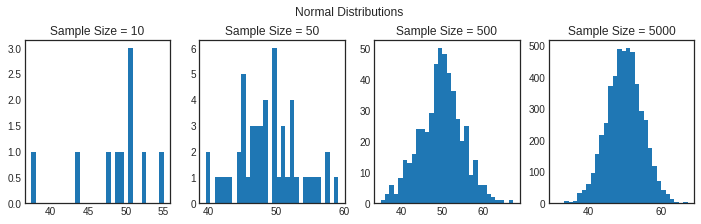

In [17]:
# Your code here
plt.style.use('seaborn-white')

fig, axis = plt.subplots(1, 4, sharex=False, sharey=False, figsize=(12,3))
fig.suptitle('Normal Distributions', verticalalignment='bottom')

for i, ax in enumerate(axis): 
    axis[i].hist(normal_dists[i], bins=30)
    axis[i].set_title('Sample Size = {}'.format(len(normal_dists[i])))


#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [5]:
# Your comment and explanation here

# Cuanto más muestras tomamos, más se parece a una campana de Gauss. 

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

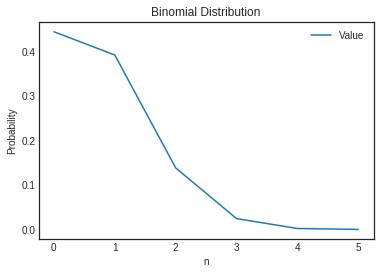

In [22]:
# Your code here

n, p = 5, 0.15

# mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

x = list(range(n+1))
plt.plot(x, binom.pmf(x, n, p), label='Value')
plt.title('Binomial Distribution')
plt.xlabel('n')
plt.ylabel('Probability')
plt.legend()
plt.show()

#### Explain what you observe from the plot above

In [7]:
# Your comment here

# Cuantos más usuarios esperamos que vean el anuncio menos probable es que ocurra. 

#### Now plot PMP with 50, 500, and 5000 visitors.

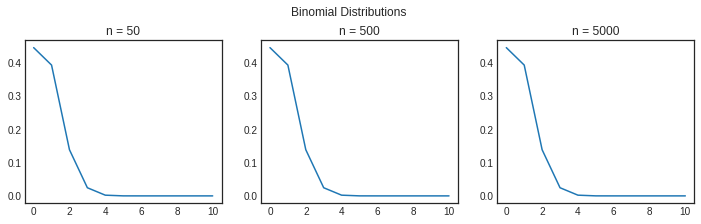

In [36]:
# Your code here

visitors = [50, 500, 5000]
p = 0.15

fig, axis = plt.subplots(1, len(visitors), sharex=False, sharey=False, figsize=(12,3))
fig.suptitle('Binomial Distributions', verticalalignment='bottom')
    
for i, v in enumerate(visitors): 
    x = list(range(10+1))
    axis[i].plot(x, binom.pmf(x, n, p))
    axis[i].set_title('n = {}'.format(v))



#### What did you notice from the distribution plots? Comment your findings.

In [9]:
# Your comment here

# A partir de 4 la probalilidad es practicamente 0

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [10]:
# Your comment here



#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [49]:
# Your code here

mu = 300
x = 320
poisson.pmf(x, mu)

0.011612348610402475

#### What is the probability of getting 60 visits?

In [50]:
# Your code here
mu = 300
x = 60
poisson.pmf(x, mu)

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

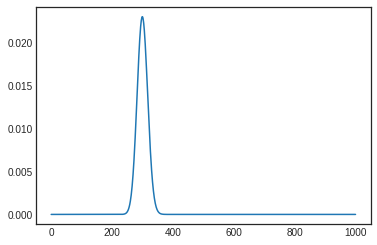

In [52]:
# your code here
mu = 300
x = list(range(1001))
y = poisson.pmf(x, mu)

plt.plot(x, y)